## Zadanie 1

W zadaniu będę korzystać z funkcji `LinearAlgebra.dot` oraz mnożenia macierzy kwadratowej razy wektor operatorem `*`

In [1]:
using LinearAlgebra
using DataFrames

## Zadanie 2

Poniżej pomocnicze funkcje mierzące czas operacji. Nie ma znaczenia postać wektorów, dlatego korzystam po prostu z funkcji `rand`.

In [2]:
function getDotTime(n)
    v = map(x -> x + 0.5, rand(n))
    return @elapsed dot(v, v)
end

getDotTime (generic function with 1 method)

In [3]:
function getMultTime(n)
    v = map(x -> x + 0.5, rand(n))
    M = map(x -> x + 0.5, rand(n, n))
    return @elapsed M * v
end

getMultTime (generic function with 1 method)

`d` – liczba różnych długości wektora / macierzy

`n` – liczba powtórzeń

`f` – funkcja pomocnicza – pozwala obliczyć wartości funkcji kilka razy dla różnego iteratora

Budujemy od razu DataFrame

In [4]:
d = 10
n = 10

f(x, n) = 1000 * (div(x, n) + 1)

df = DataFrame(
    n = map(x -> f(x, n), 0:(d * n - 1)),
    dot_time = map(x -> getDotTime(f(x, n)), 0:(d * n - 1)), 
    mult_time = map(x -> getMultTime(f(x, n)), 0:(d * n - 1))
)

,n,dot_time,mult_time
,Int64,Float64,Float64
1,1000,1.386e-6,0.000674493
2,1000,3.34e-7,0.000154767
3,1000,3.36e-7,0.00017097
4,1000,3.3e-7,0.000220797
5,1000,3.31e-7,0.000168542
6,1000,3.32e-7,0.000172483
7,1000,3.36e-7,0.000317281
8,1000,3.35e-7,0.000251216
9,1000,3.33e-7,0.000162285


In [5]:
using Plots

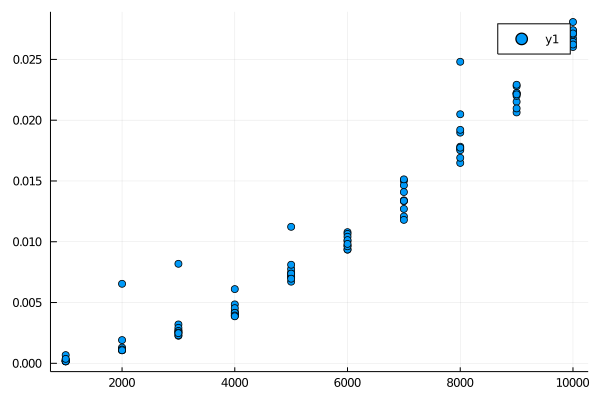

In [6]:
# scatter(df.n, df.mult_time)

## Zadanie 3

In [7]:
using CSV

In [8]:
out = "measurements.csv"
CSV.write(out, df)

"measurements.csv"

## Zadanie 4

In [22]:
using CSV

In [23]:
file = "measurements.csv"
data = CSV.read(file, delim=",", DataFrame)
data

,n,dot_time,mult_time
,Int64,Float64,Float64
1,1000,1.386e-6,0.000674493
2,1000,3.34e-7,0.000154767
3,1000,3.36e-7,0.00017097
4,1000,3.3e-7,0.000220797
5,1000,3.31e-7,0.000168542
6,1000,3.32e-7,0.000172483
7,1000,3.36e-7,0.000317281
8,1000,3.35e-7,0.000251216
9,1000,3.33e-7,0.000162285


## Zadanie 5, 6, 7

In [24]:
using Statistics
using Plots

In [25]:
combined = combine(
    groupby(data, :n), 
    "dot_time" => mean, 
    "dot_time" => std, 
    "mult_time" => mean, 
    "mult_time" => std
)

,n,dot_time_mean,dot_time_std,mult_time_mean,mult_time_std
,Int64,Float64,Float64,Float64,Float64
1,1000,4.332e-7,3.35222e-7,0.000266018,0.000160704
2,2000,5.938e-7,6.30344e-9,0.00175038,0.00170192
3,3000,9.483e-7,1.51294e-8,0.00317958,0.00178084
4,4000,1.3521e-6,2.49953e-8,0.00437574,0.000680177
5,5000,1.7214e-6,6.22008e-8,0.00771826,0.00129543
6,6000,2.0193e-6,4.51542e-8,0.00998933,0.00050934
7,7000,2.3503e-6,3.66971e-8,0.013557,0.00116327
8,8000,2.6515e-6,2.10515e-8,0.0187603,0.00242858
9,9000,3.07029e-6,1.68229e-7,0.021958,0.000726699


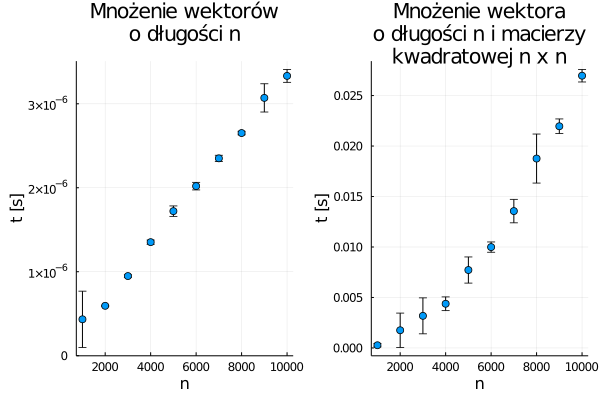

In [41]:
c = combined

A = scatter(
    c.n,
    c.dot_time_mean,
    label="",
    title="Mnożenie wektorów\no długości n",
    xaxis="n",
    yaxis="t [s]",
    yerr=c.dot_time_std
)
B = scatter(
    c.n,
    c.mult_time_mean,
    label="",
    title="Mnożenie wektora\no długości n i macierzy\nkwadratowej n x n",
    xaxis="n",
    yaxis="t [s]",
    yerr=c.mult_time_std
)
plot(A, B, layout=2)

Można zauważyć, że, zgodnie z oczekiwaniami, mnożenie wektorów długości $n$ jest wykonywane w czasie liniowym,
a mnożenie macierzy $n \times n$ zajmuje czas kwadratowy.